# Expectation-Maximization (EM) Algorithm

### Términos clave

- **Variables latentes:** Son partes ocultas de los datos que no podemos ver directamente, pero que influyen en lo que vemos. Intentamos adivinar sus valores utilizando los datos visibles.
- **Probabilidad:** Se refiere a la probabilidad de ver los datos disponibles según ciertos supuestos o parámetros. El algoritmo EM busca los parámetros que hacen que los datos sean más probables.
- **Log-Verosimilitud:** Es simplemente el logaritmo natural de la función de verosimilitud. Se utiliza para simplificar los cálculos y medir el ajuste del modelo a los datos. El algoritmo EM intenta maximizar el log-verosimilitud para mejorar el ajuste del modelo.
- **Estimación de Máxima Verosimilitud (EMV):** Este método permite encontrar los valores óptimos para los parámetros de un modelo. Busca los valores que hacen que los datos observados tengan la mayor probabilidad de ocurrencia.
- **Probabilidad Posterior:** En los métodos bayesianos, es la probabilidad de los parámetros dados tanto el conocimiento previo como los datos observados. En EM, ayuda a estimar los mejores parámetros cuando existe incertidumbre sobre los datos.
- **Paso de Expectativa (E):** En este paso, el algoritmo estima la información faltante u oculta (variables latentes) basándose en los datos observados y los parámetros actuales. Calcula las probabilidades de los valores ocultos según lo que podemos observar.
- **Paso de maximización (M):** Este paso actualiza los parámetros encontrando los valores que maximizan la probabilidad según las estimaciones del paso E.
- **Convergencia:** La convergencia ocurre cuando el algoritmo alcanza un punto estable. Esto se verifica observando si los cambios en los parámetros del modelo o en la verosimilitud logarítmica son lo suficientemente pequeños como para detener el proceso.

### Funcionamiento del algoritmo

1. Inicialización: el algoritmo comienza con valores de parámetros iniciales y asume que los datos observados provienen de un modelo específico.

2. Paso E (Paso de expectativa): 
Encuentre los datos faltantes u ocultos en función de los parámetros actuales.
Calcular la probabilidad posterior de cada variable latente basándose en los datos observados.
Calcule la verosimilitud logarítmica de los datos observados utilizando las estimaciones de los parámetros actuales.

3. Paso M (Paso de maximización):
Actualice los parámetros del modelo maximizando la verosimilitud.
Cuanto mejor sea el modelo mayor será este valor.

4. Convergencia:
Compruebe si los parámetros del modelo son estables y convergentes.
Si los cambios en la verosimilitud logarítmica o en los parámetros están por debajo de un umbral establecido, deténgase. En caso contrario, repita los pasos E y M hasta alcanzar la convergencia.

In [20]:
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

Generar un conjunto de datos con dos componentes gaussianos de valores de datos a partir de dos distribuciones normales diferentes:

- Uno centrado alrededor de 2 (con más extensión).
- Otro alrededor de -1 (con menor spread).

Estos dos conjuntos se combinan para formar un único conjunto de datos. Representamos gráficamente este conjunto de datos para visualizar la distribución de los valores.

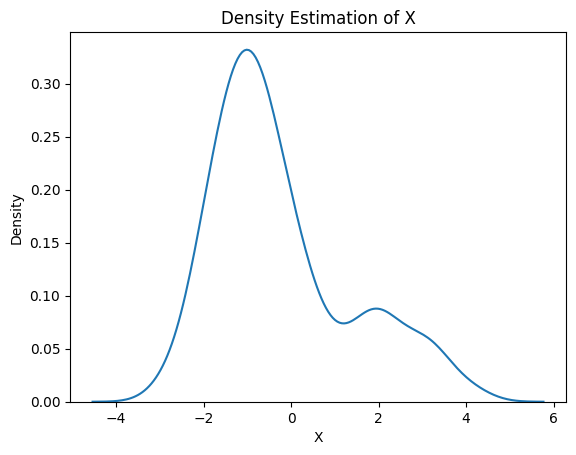

In [40]:
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)
X = np.concatenate([X1, X2])

sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()

Hacemos conjeturas iniciales para cada grupo:

- Media (promedio),
- Desviación estándar (spread),
- Proporción (cuánto contribuye cada grupo a los datos totales).

In [41]:
mu1_hat, sigma1_hat = np.mean(X1), np.std(X1)
mu2_hat, sigma2_hat = np.mean(X2), np.std(X2)
pi1_hat, pi2_hat = len(X1) / len(X), len(X2) / len(X)

Ejecutamos un ciclo de 50 rondas llamadas épocas. En cada ronda:

- El paso E calcula las responsabilidades (valores gamma) evaluando las densidades de probabilidad gaussianas de cada componente y ponderándolas según las proporciones correspondientes.
- El paso M actualiza los parámetros calculando la media ponderada y la desviación estándar de cada componente.

También calculamos la verosimilitud logarítmica en cada ronda para comprobar si el modelo está mejorando. Esto mide la eficacia del modelo para explicar los datos.

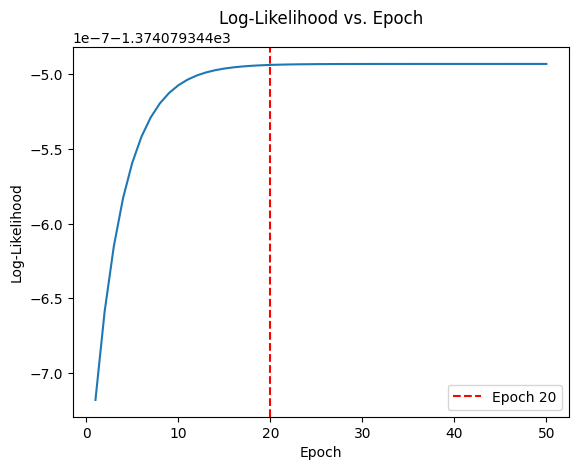

In [44]:
num_epochs = 50
log_likelihoods = []

for epoch in range(num_epochs):
    # E-step:
    gamma1 = pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
    gamma2 = pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)
    total = gamma1 + gamma2
    gamma1 /= total
    gamma2 /= total
    
    # M-step
    mu1_hat = np.sum(gamma1 * X) / np.sum(gamma1)
    mu2_hat = np.sum(gamma2 * X) / np.sum(gamma2)
    sigma1_hat = np.sqrt(np.sum(gamma1 * (X - mu1_hat)**2) / np.sum(gamma1))
    sigma2_hat = np.sqrt(np.sum(gamma2 * (X - mu2_hat)**2) / np.sum(gamma2))
    pi1_hat = np.mean(gamma1)
    pi2_hat = np.mean(gamma2)
    
    # Compute log-likelihood
    log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
                                   + pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)))
    log_likelihoods.append(log_likelihood)

    
plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.axvline(x=20, color='red', linestyle='--', label='Epoch 20')
plt.legend()
plt.title('Log-Likelihood vs. Epoch')
plt.show()

Ahora finalmente visualizaremos la curva que compara la curva estimada final (en rojo) con la curva suave de los datos originales (en verde).

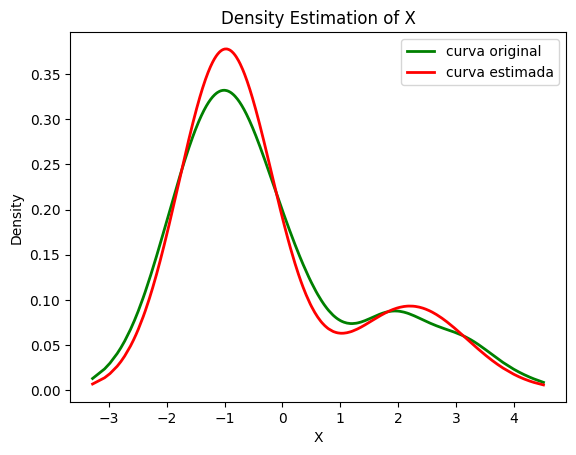

In [45]:
X_sorted = np.sort(X)
density_estimation = pi1_hat*norm.pdf(X_sorted,
                                        mu1_hat, 
                                        sigma1_hat) + pi2_hat * norm.pdf(X_sorted,
                                                                         mu2_hat, 
                                                                         sigma2_hat)


plt.plot(X_sorted, gaussian_kde(X_sorted)(X_sorted), color='green', linewidth=2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.legend(['curva original','curva estimada'])
plt.show()

La imagen superior compara la estimación de la densidad kernel (verde) y la densidad de la mezcla (roja) para la variable X. Ambas muestran patrones similares, con un pico principal cerca de -1,5 y una pequeña protuberancia alrededor de 2, lo que indica dos grupos de datos. La curva roja es ligeramente más suave y nítida que la verde.

**Ventajas del algoritmo EM**
- Mejora siempre los resultados : con cada paso, el algoritmo mejora la probabilidad (posibilidades) de encontrar una buena solución.
- Fácil de implementar : los dos pasos (paso E y paso M) suelen ser fáciles de codificar para muchos problemas.
- Soluciones matemáticas rápidas : en muchos casos, el paso M tiene una solución matemática directa (forma cerrada), lo que lo hace eficiente.

**Desventajas del algoritmo EM**
- Toma tiempo finalizarlo: converge lentamente, lo que significa que pueden necesitarse muchas iteraciones para llegar a la mejor solución.
- Se queda estancado en lo mejor local: en lugar de encontrar la mejor solución absoluta, podría conformarse con una "suficientemente buena".
- Necesita probabilidades adicionales: a diferencia de algunos métodos de optimización que solo necesitan probabilidad hacia adelante, EM requiere probabilidades tanto hacia adelante como hacia atrás, lo que lo hace un poco más complejo.

El algoritmo EM estima iterativamente los datos faltantes y actualiza los parámetros del modelo para mejorar la precisión. Al alternar entre los pasos E y M, refina el modelo hasta que converge, lo que lo convierte en una herramienta ampliamente utilizada para gestionar datos ocultos o incompletos en el aprendizaje automático.